# Métricas de Evaluación en Machine Learning

Evaluar el rendimiento de los modelos de Machine Learning seleccionando las métricas adecuadas para diferentes tipos de problemas (regresión y clasificación) y entender las estrategias de validación para obtener estimaciones fiables del rendimiento en datos no vistos (test).

## Estrategias de Evaluación de Modelos

### Separación de Datos Inicial

Normalmente tendremos un único dataset, que dividiremos (split) en dos subconjuntos **disjuntos**: entrenamiento (Training) y prueba (Test).

- **¿Por qué separamos los datos?**: La razón fundamental es evitar el overfitting (sobreajuste). Un modelo puede memorizar los datos de entrenamiento perfectamente pero no dar ni una con datos que no ha visto nunca. El conjunto de test simula estos datos nuevos.
- **Disjuntos**: Es imprescindible que no haya solapamiento entre Training y Test. Cualquier dato en Test no debe haber sido visto por el modelo durante el entrenamiento o cualquier otra fase (e.g., preprocesado).
- **Proporciones de los conjuntos**: Típicamente 70/30, 80/20 (Training/Test). La elección dependerá del tamaño del dataset.
- **Aleatoriedad**: El split debería ser aleatorio, sobre todo si el conjunto de datos sigue algún tipo de orden (e.g., cliente1, cliente2, cliente3,...) para asegurar que ambos conjuntos sean representativos. Aunque cuando tenemos series temporales la cosa cambia.
- **Estratificación**: En problemas de clasificación, especialmente con clases desbalanceadas, se recomienda un split estratificado (mantiene la proporción de las clases).

<div style="text-align: center;">
    <img src="./images/metricas/train_test_sets.png" style="width:40%">
</div>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, TimeSeriesSplit
import seaborn as sns
import yfinance as yf

Distribución de etiquetas en el conjunto original

In [ ]:
# Leemos los datos desde el archivo CSV a un DataFrame de Pandas.
data = pd.read_csv("./dataset/credit-score-classification_train-processed.csv")
data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Month,Credit_Mix,Credit_Score
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,11.27,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,10.27,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1
99997,25.0,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,11.50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,2.0,2


Credit_Score
2    0.53174
1    0.28998
0    0.17828
Name: count, dtype: float64


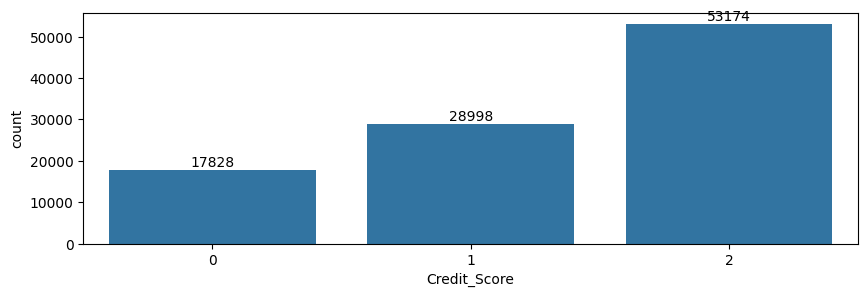

In [4]:
print(data.loc[:, "Credit_Score"].value_counts() / data.shape[0])

plt.figure(figsize=(10, 3))
ax = sns.countplot(data=data, x="Credit_Score")
ax.bar_label(ax.containers[0])
plt.show()

Distribución Train/Test sin Shuffle

In [18]:
features_columns = data.columns[:-1]  # Todas las columnas menos la última.
label_column = data.columns[-1]  # La última columna.
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features_columns], data.loc[:, label_column], test_size=0.2, random_state=42, shuffle=False
)

Credit_Score
2    0.530987
1    0.292888
0    0.176125
Name: count, dtype: float64
Credit_Score
2    0.53475
1    0.27835
0    0.18690
Name: count, dtype: float64


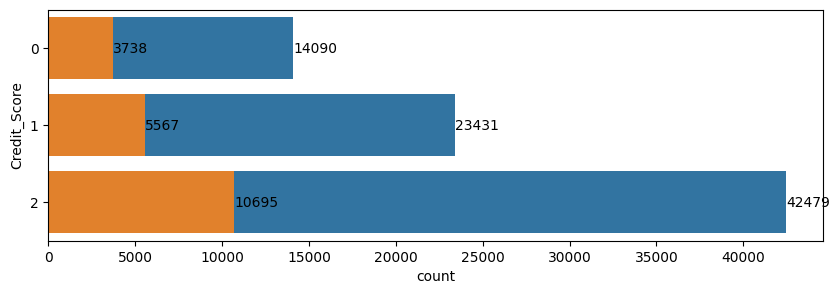

In [19]:
print(y_train.value_counts() / y_train.shape[0])
print(y_test.value_counts() / y_test.shape[0])

plt.figure(figsize=(10, 3))

ax = sns.countplot(data=y_train.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[0])

ax = sns.countplot(data=y_test.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[1])

plt.show()

Distribución Train/Test con Shuffle

In [20]:
features_columns = data.columns[:-1]  # Todas las columnas menos la última.
label_column = data.columns[-1]  # La última columna.
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features_columns], data.loc[:, label_column], test_size=0.2, random_state=42, shuffle=True
)

Credit_Score
2    0.532188
1    0.289050
0    0.178762
Name: count, dtype: float64
Credit_Score
2    0.52995
1    0.29370
0    0.17635
Name: count, dtype: float64


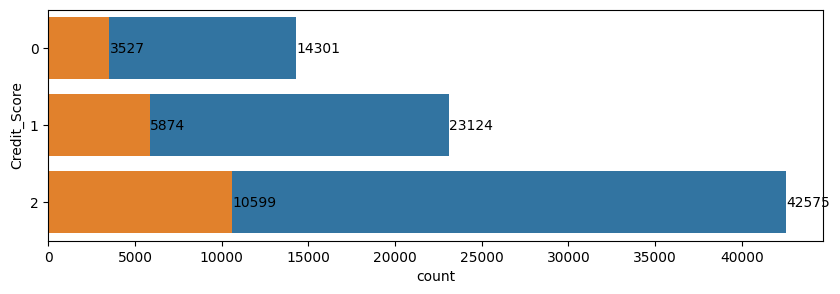

In [21]:
print(y_train.value_counts() / y_train.shape[0])
print(y_test.value_counts() / y_test.shape[0])

plt.figure(figsize=(10, 3))

ax = sns.countplot(data=y_train.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[0])

ax = sns.countplot(data=y_test.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[1])

plt.show()

Distribución Train/Test con Stratification

In [ ]:
features_columns = data.columns[:-1]  # Todas las columnas menos la última.
label_column = data.columns[-1]  # La última columna.
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features_columns],
    data.loc[:, label_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=data.loc[:, label_column],
)

Credit_Score
2    0.531737
1    0.289988
0    0.178275
Name: count, dtype: float64
Credit_Score
2    0.53175
1    0.28995
0    0.17830
Name: count, dtype: float64


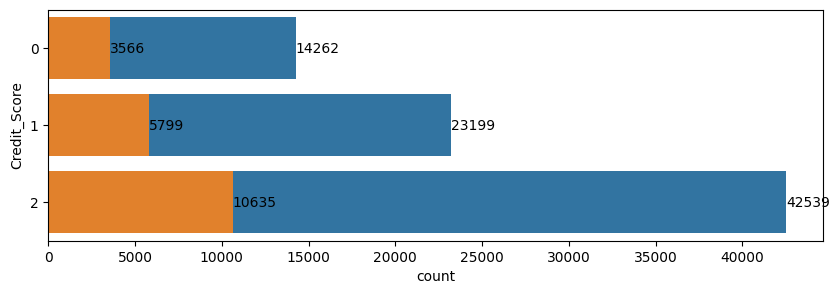

In [23]:
print(y_train.value_counts() / y_train.shape[0])
print(y_test.value_counts() / y_test.shape[0])

plt.figure(figsize=(10, 3))

ax = sns.countplot(data=y_train.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[0])

ax = sns.countplot(data=y_test.to_frame(), y="Credit_Score")
ax.bar_label(ax.containers[1])

plt.show()

Separación de un conjunto de datos con índice temporal

In [ ]:
idx_price_path = "./dataset/data_idx_sp500.csv"
data_idx = pd.read_csv(idx_price_path, parse_dates=True, index_col="Date", dtype=np.float32)
data_idx.dropna(inplace=True)

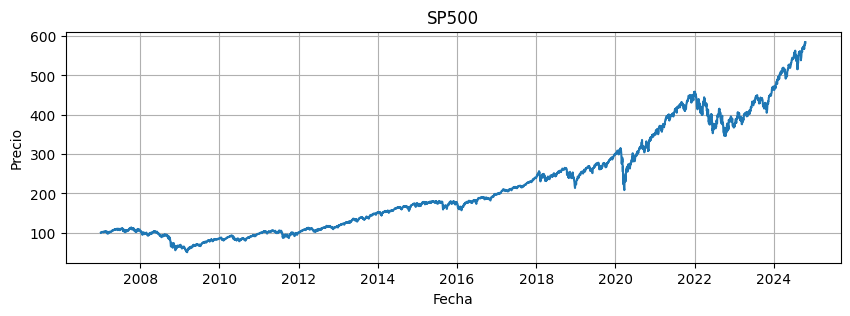

In [28]:
plt.figure(figsize=(10, 3))
plt.plot(data_idx, label="SP500")
plt.grid(True)
plt.title("SP500")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

¡¡ Cuidado con la forma de trabajar de ``Pandas`` con ``loc`` !!

Ref.: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

> Warning
>
> Note that contrary to usual python slices, both the start and the stop are included

2007-01-03 00:00:00 2020-12-31 00:00:00
2020-12-31 00:00:00 2024-10-18 00:00:00


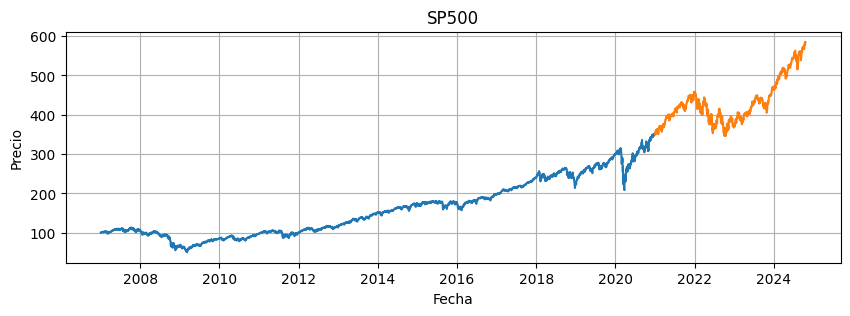

In [ ]:
start_date = data_idx.index[0]
end_date = "2020-12-31"

X_train_idx = data_idx.loc[start_date:end_date]
X_test_idx = data_idx.loc[end_date:]

print(X_train_idx.index.min(), X_train_idx.index.max())
print(X_test_idx.index.min(), X_test_idx.index.max())

plt.figure(figsize=(10, 3))
plt.plot(X_train_idx, label="Train")
plt.plot(X_test_idx, label="Test")
plt.grid(True)
plt.title("SP500")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

Usad ``iloc`` o poned las fechas a mano.

2007-01-03 00:00:00 2020-12-31 00:00:00
2021-01-04 00:00:00 2024-10-18 00:00:00


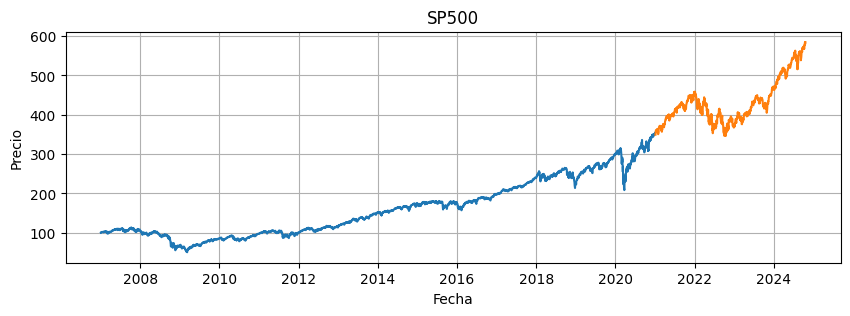

In [ ]:
test_start_date = "2021-01-04"
pos_test_start_date = data_idx.index.get_loc(test_start_date)

X_train_idx = data_idx.iloc[:pos_test_start_date]
X_test_idx = data_idx.iloc[pos_test_start_date:]

print(X_train_idx.index.min(), X_train_idx.index.max())
print(X_test_idx.index.min(), X_test_idx.index.max())

plt.figure(figsize=(10, 3))
plt.plot(X_train_idx, label="Train")
plt.plot(X_test_idx, label="Test")
plt.grid(True)
plt.title("SP500")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

### El Rol Sagrado del Conjunto de Test

Una vez separados, **solo se trabaja con datos de training** para normalización, selección de hiperparámetros y selección del mejor modelo. **NO se puede decidir qué modelo usar utilizando el test**. El test simula producción.

- **Regla de Oro**: El conjunto de Test se usa **UNA SOLA VEZ**, al final del todo, para obtener una estimación insesgada del rendimiento del modelo final seleccionado.
- **Data Leakage**: Si se usa test para tomar decisiones de modelado (qué features usar, qué hiperparámetros, qué algoritmo es mejor), se está "filtrando" información de test al proceso de entrenamiento. El rendimiento reportado será artificialmente alto y no generalizará (SPOILER ALERT: esto es lo que normalmente se ve por ahí en Internet).
- Ejemplos de **Uso Exclusivo de Training**:
    - **Normalización/Escalado**: Calcular media, std, min, max SOLO con datos de training y luego aplicar esa transformación a training y a test.
    - **Selección de Hiperparámetros**: Encontrar los mejores valores para k en KNN, profundidad de un árbol, etc.
    - **Selección de Modelo**: Comparar el rendimiento de varios modelos.

¿Entonces **cómo evaluamos los modelos** (durante el desarrollo)?

### Validación Simple (Holdout)

Para evitar usar el conjunto de datos de Test durante el desarrollo del modelo, se crea un *mini-test set* a partir del conjunto de entrenamiento original llamado *validation*.

**Proceso**

- Split 1: Datos Originales -> Training_Full / Test
- Split 2: Training_Full -> Training_Dev / Validation

<div style="text-align: center;">
    <img src="./images/metricas/train_test_validation_sets.png" style="width:50%">
</div>

**Uso**

1. Se entrena el modelo en Training_Dev.
2. Se evalúa y se ajustan hiperparámetros usando el conjunto de Validation.
3. Se seleccionan diferentes modelos comparando su rendimiento en Validation.
4. Una vez se ha elegido el modelo final y sus hiperparámetros óptimos, se puede re-entrenar este modelo usando todo el Training_Full (Dev + Validation) para aprovechar más datos antes de la evaluación final en el Test set.

**Desventaja de la Validación Simple**: El rendimiento en el conjunto de validación puede ser sensible a cómo se hizo exactamente ese segundo split, especialmente si el dataset es pequeño.

In [43]:
features_columns = data.columns[:-1]  # Todas las columnas menos la última.
label_column = data.columns[-1]  # La última columna.

# Split 1.
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features_columns], data.loc[:, label_column], test_size=0.2, random_state=42, shuffle=True
)
# Split 2.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(64000, 40) (64000,)
(16000, 40) (16000,)
(20000, 40) (20000,)


### Validación Cruzada (K-Fold CV)

Vamos a dividir el conjunto de entrenamiento en K "folds" (divisiones). Se usan K-1 folds para entrenar y 1 para validar, rotando el fold de validación. El proceso se repite K veces.

Esto nos **evita el posible over fitting** que podría producirse en la Validación Simple, ya que cada muestra se usa tanto para entrenar como para validar exactamente una vez.

<div style="text-align: center;">
    <img src="./images/metricas/cross_validation_sets.png" style="width:40%">
</div>

**Proceso**

1. Primero dividimos todos los datos disponibles en Train y Test.
    - Train es el que se va a usar para K-Fold CV.
2. Se divide Train en K folds.

**Uso**

1. Entrenamiento:
    - Iteración 1 (Split 1): Entrena con Folds 2,3,4,5,...,n; valida con Fold 1.
    - Iteración 2 (Split 2): Entrena con Folds 1,3,4,5,...,n; valida con Fold 2.
    - [...]
    - Iteración n (Split n): Entrena con Folds 1,2,3,4,...,n-1; valida con Fold n.

2. Se obtienen **K métricas de rendimiento** (una por cada fold de validación).
    - Se promedian las K métricas para obtener la estimación general del rendimiento.
    - Se calcula la desviación estándar para entender la variabilidad.
3. Se utiliza el rendimiento promedio y la desviación estándar de K-Fold CV para **seleccionar hiperparámetros** o **comparar modelos**.
4. Una vez elegido el mejor modelo/hiperparámetros, **se entrena ese modelo con TODO el conjunto de datos de Train** y se **evalúa UNA VEZ en el conjunto de datos de Test**.

**Variantes**:
- Stratified K-Fold: Clasificación desbalanceada. Asegura que cada fold mantenga la proporción de clases.

In [68]:
def visualize_split(train_index, val_index):
    v = np.ones(len(train_index) + len(val_index))
    v[val_index] = 0
    plt.figure(figsize=(10, 2))
    sns.heatmap(
        [v],
        cmap="binary",
        cbar=False,
        xticklabels=False,
        yticklabels=False,
    )
    plt.grid(True)
    plt.title("Train/Val split")
    plt.xlabel("Índice")
    plt.ylabel("Train/Val")
    plt.show()

X_train: (80000, 40), y_train: (80000,)
X_test: (20000, 40), y_test: (20000,)
Fold 0:
  Train: index=[    0     1     2 ... 79996 79997 79999]; len=64000
  Val:   index=[    3    10    11 ... 79991 79995 79998]; len=16000


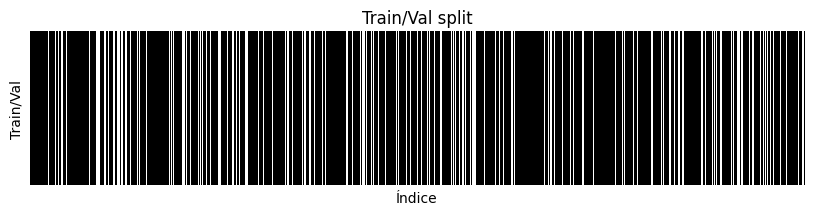

Fold 1:
  Train: index=[    0     2     3 ... 79995 79997 79998]; len=64000
  Val:   index=[    1     9    26 ... 79993 79996 79999]; len=16000


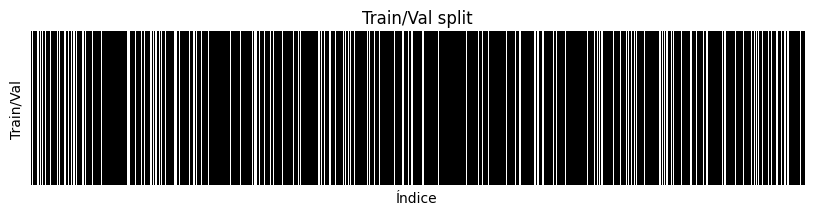

Fold 2:
  Train: index=[    1     3     4 ... 79997 79998 79999]; len=64000
  Val:   index=[    0     2     5 ... 79989 79990 79992]; len=16000


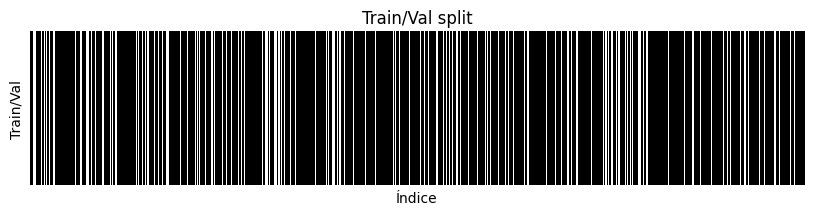

Fold 3:
  Train: index=[    0     1     2 ... 79996 79998 79999]; len=64000
  Val:   index=[    6     8    12 ... 79964 79983 79997]; len=16000


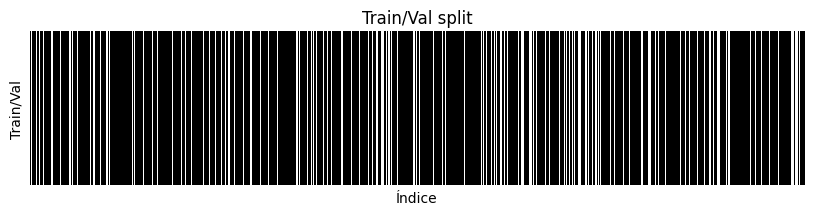

Fold 4:
  Train: index=[    0     1     2 ... 79997 79998 79999]; len=64000
  Val:   index=[    4    16    17 ... 79986 79987 79994]; len=16000


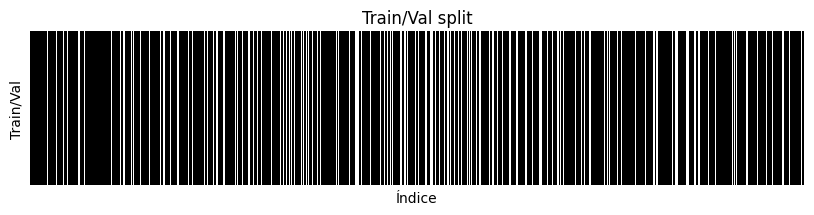

In [ ]:
# Leemos los datos desde el archivo CSV a un DataFrame de Pandas.
data = pd.read_csv("./dataset/credit-score-classification_train-processed.csv")

# Train-Test Split.
features_columns = data.columns[:-1]  # Todas las columnas menos la última.
label_column = data.columns[-1]  # La última columna.
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features_columns],
    data.loc[:, label_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=data.loc[:, label_column],
)

# Tamaños de los conjuntos de datos.
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}; len={len(train_index)}")
    print(f"  Val:   index={val_index}; len={len(val_index)}")
    visualize_split(train_index, val_index)

### Alternativas a K-Fold para series temporales

En series temporales (e.g., retornos de activos financieros) **no tiene sentido aplicar un k-fold "puro"** (es decir, particionar arbitrariamente los bloques de datos, y entrenar y validar sin respetar el orden temporal), por varias razones prácticas y teóricas:

1. **Data Leakage**
   Si en una iteración usas folds de periodos posteriores para entrenar y luego validas en un fold anterior (e.g., entrenar con $k_2, k_3, k_4, k_5$ y validar con $k_1$), estás aprendiendo patrones del *futuro* para predecir el *pasado*. Eso viola la premisa de cualquier modelo de series temporales que nos dice que **sólo debe apoyarse en información previa**.
2. **Dependencia temporal y autocorrelación**
   Muchas series temporales están autocorrelacionadas: lo que ocurre hoy depende de lo que pasó ayer. Romper esa correlación entrenando en bloques no contiguos y validando en un intervalo intermedio distorsiona la evaluación, porque el modelo no ve la continuidad de la serie (tendencias, estacionalidades, shocks de mercado).
3. **Mejores alternativas para CV en series temporales**
   * **Rolling-window**: avanzas una ventana fija de entrenamiento y validación.
   * **Expanding window**: cada vez añades más datos al set de entrenamiento, dejando un bloque adyacente para validación.
   * **Purged k-fold**: eliminar datos entre folds para que ninguna propiedad de Train tenga posibilidad de traspasar a Validation.

TimeSeries k-fold cv sin purga

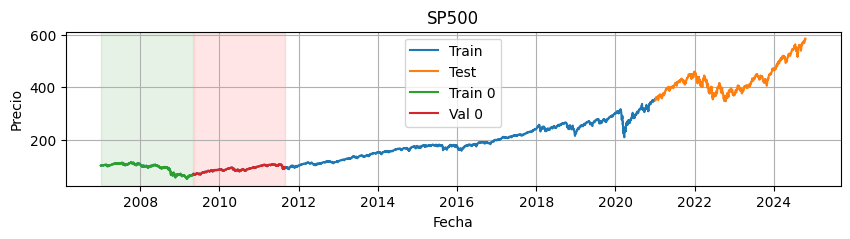

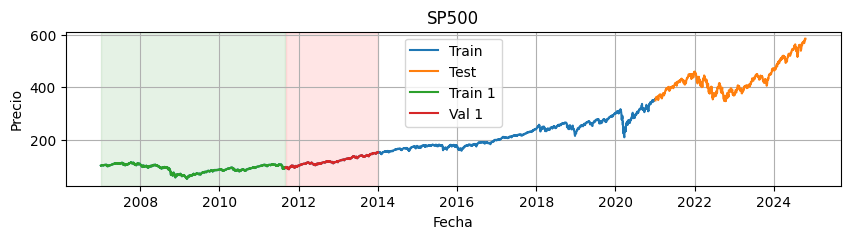

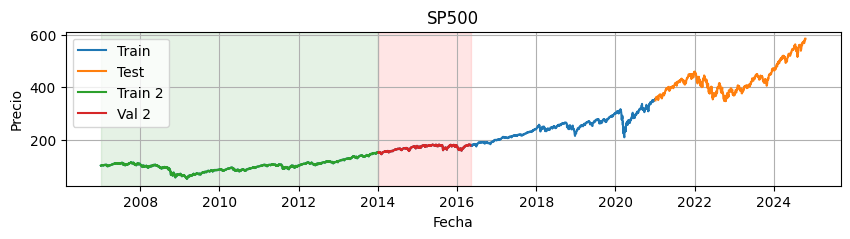

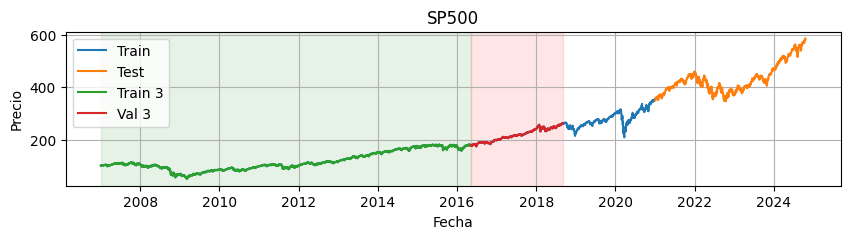

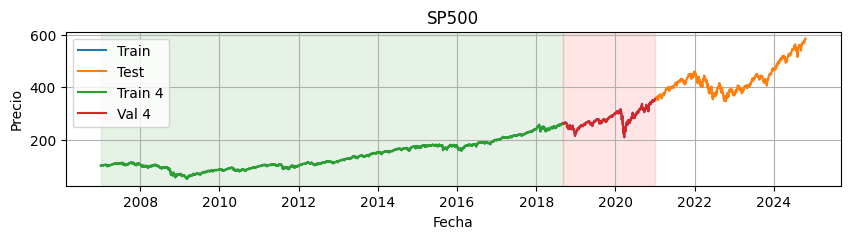

In [ ]:
# Leemos los datos desde el archivo CSV a un DataFrame de Pandas.
idx_price_path = "./dataset/data_idx_sp500.csv"
data_idx = pd.read_csv(idx_price_path, parse_dates=True, index_col="Date", dtype=np.float32)
data_idx.dropna(inplace=True)

# Split train-test.
test_start_date = "2021-01-04"
pos_test_start_date = data_idx.index.get_loc(test_start_date)

X_train_idx = data_idx.iloc[:pos_test_start_date]
X_test_idx = data_idx.iloc[pos_test_start_date:]

# TimeSeries k-fold cv sin purga.
tscv = TimeSeriesSplit(n_splits=5, gap=0)

for i, (train_index, val_index) in enumerate(tscv.split(X_train_idx)):
    plt.figure(figsize=(10, 2))
    plt.plot(X_train_idx, label="Train")
    plt.plot(X_test_idx, label="Test")
    plt.plot(X_train_idx.iloc[train_index], label=f"Train {i}")
    plt.plot(X_train_idx.iloc[val_index], label=f"Val {i}")
    plt.axvspan(X_train_idx.index[train_index[0]], X_train_idx.index[train_index[-1]], color="green", alpha=0.1)
    plt.axvspan(X_train_idx.index[val_index[0]], X_train_idx.index[val_index[-1]], color="red", alpha=0.1)
    plt.grid(True)
    plt.title("SP500")
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.legend()
    plt.show()

TimeSeries k-fold cv con purga

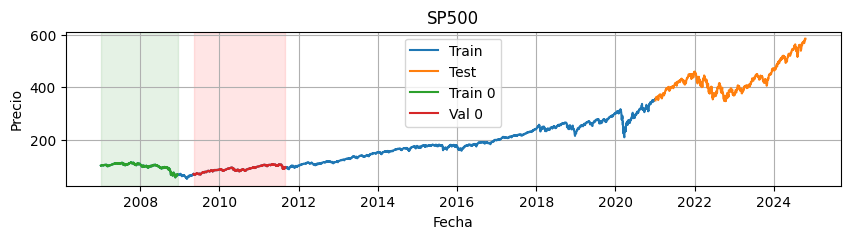

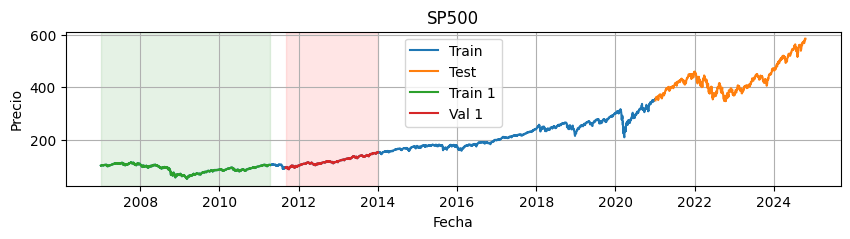

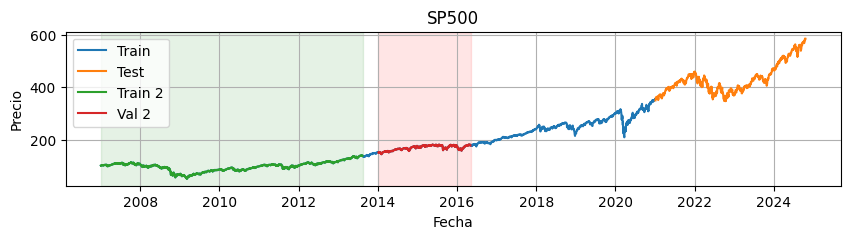

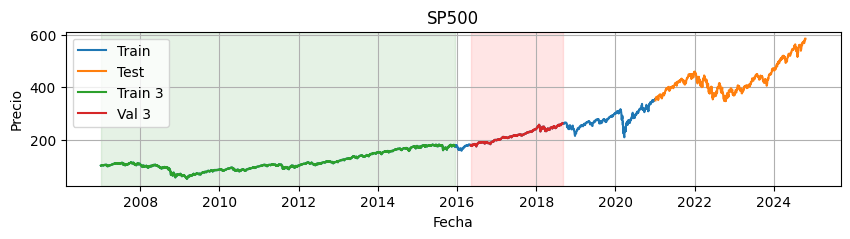

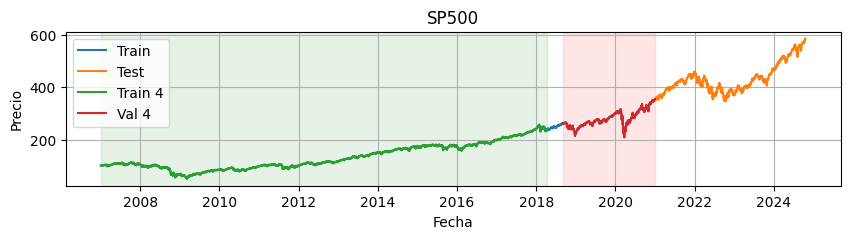

In [ ]:
# Leemos los datos desde el archivo CSV a un DataFrame de Pandas.
idx_price_path = "./dataset/data_idx_sp500.csv"
data_idx = pd.read_csv(idx_price_path, parse_dates=True, index_col="Date", dtype=np.float32)
data_idx.dropna(inplace=True)

# Split train-test.
test_start_date = "2021-01-04"
pos_test_start_date = data_idx.index.get_loc(test_start_date)

X_train_idx = data_idx.iloc[:pos_test_start_date]
X_test_idx = data_idx.iloc[pos_test_start_date:]

# TimeSeries k-fold cv sin purga.
tscv = TimeSeriesSplit(n_splits=5, gap=100)

for i, (train_index, val_index) in enumerate(tscv.split(X_train_idx)):
    plt.figure(figsize=(10, 2))
    plt.plot(X_train_idx, label="Train")
    plt.plot(X_test_idx, label="Test")
    plt.plot(X_train_idx.iloc[train_index], label=f"Train {i}")
    plt.plot(X_train_idx.iloc[val_index], label=f"Val {i}")
    plt.axvspan(X_train_idx.index[train_index[0]], X_train_idx.index[train_index[-1]], color="green", alpha=0.1)
    plt.axvspan(X_train_idx.index[val_index[0]], X_train_idx.index[val_index[-1]], color="red", alpha=0.1)
    plt.grid(True)
    plt.title("SP500")
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.legend()
    plt.show()

## Métricas de Evaluación

### ¿Qué Métricas Utilizamos?

Depende de si nos enfrentamos a un problema de **regresión** o de **clasificación**.

### Métricas de Regresión

- **Error Absoluto Medio** (MAE - *Mean Absolute Error*)

  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$

    - **Interpretación**: Promedio de las diferencias absolutas entre los valores reales ($ y_i $) y las predicciones ($ \hat{y}_i $).
    - **Unidades**: Igual que la variable objetivo. Muy intuitivo.
    - **Sensibilidad**: Menos sensible a valores atípicos (*outliers*) que el MSE.

- **Error Cuadrático Medio** (MSE - *Mean Squared Error*)

  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

    - **Interpretación**: Promedio de los errores al cuadrado. Penaliza errores grandes.
    - **Unidades**: Cuadrado de las unidades de la variable objetivo. Menos intuitivo.
    - **Sensibilidad**: Muy sensible a *outliers*.
    - **Aplicación**: Muy usado como función de pérdida en entrenamiento de modelos.

- **Raíz cuadrada del Error Cuadrático Medio** (RMSE - *Root Mean Squared Error*)

  $$
  \text{RMSE} = \sqrt{\text{MSE}}
  $$

    - **Interpretación**: Recupera las unidades originales. Más fácil de interpretar que MSE, pero mantiene su sensibilidad a errores grandes.

- **Coeficiente de Determinación** (R²)

  $$
  R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \mu)^2}
  $$
  donde $ \mu $ es la media de los valores reales $ y_i $.

    - **Interpretación**: Proporción de la varianza explicada por el modelo.  
    - **Rango**:  
        - $ R^2 = 1 $: El modelo explica toda la variabilidad de la variable dependiente
        - $ R^2 = 0 $: El modelo no explica ninguna variabilidad de la variable dependiente 
        - $ R^2 < 0 $: El modelo es peor que predecir siempre la media
    - **Advertencia**: R² tiende a aumentar al añadir más variables, aunque no sean relevantes.
    Para contrarrestar esto, se utiliza el **R² ajustado**, que penaliza la inclusión de predictores innecesarios, es decir, baja cuando añades variables independientes que no aportan.


### Métricas de Clasificación - Matriz de Confusión

La matriz de confusión es la base para la mayoría de las métricas de clasificación. Compara las clases predichas con las clases reales.

- Positivo/Negativo: Se define una clase como "positiva" (la de interés, e.g., enfermedad, spam, fraude) y la otra como "negativa".
    - **TP (True Positive)**: Acierto en la clase positiva
        - Predicho: Positivo
        - Real: Positivo
    - **FP (False Positive)**: Fallo en la clase negativa
        - Predicho: Positivo
        - Real: Negativo
    - **FN (False Negative)**: Fallo en la clase positiva
        - Predicho: Negativo
        - Real: Positivo
    - **TN (True Negative)**: Acierto en la clase negativa
        - Predicho: Negativo
        - Real: Negativo

<div style="text-align: center;">
    <img src="./images/metricas/matriz_confusion_clasificacion.png" style="width:50%">
</div>

### Fórmulas de Métricas de Clasificación

1. **Accuracy**: Proporción de predicciones correctas sobre el total de predicciones. Es útil cuando las clases están balanceadas. **OJO** cuando las clases están desbalanceadas porque **no es útil**, es engañosa.

$$
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

2. **Precision**: Indica la proporción de verdaderos positivos entre todas las predicciones positivas. Es útil cuando el coste de un falso positivo es alto, es decir, queremos estar muy seguros que cuando decimos *positivo* es realmente *positivo*.
    - Empresa de Private Equity que quiere predecir si invertir (clase positiva) o no (clase negativa) en una StartUp. Un FP implica invertir y perder la inversión, mientras que un FN implica la pérdida de una oportunidad.

$$
precision = \frac{TP}{TP + FP}
$$

3. **Recall**: Mide la capacidad del modelo para capturar los verdaderos positivos entre todos los casos reales positivos. Es útil cuando el coste de un falso negativo es alto.
    - Durante el proceso de Prevención de Blanqueo de Capitales de un banco, se predice si una transacción supone blanqueo (clase positiva) o no (clase negativa). Un FP implica que inviertes tiempo en investigar una operación legítima; mientras que un FN implica incumplimiento de las obligaciones legales del Banco, una sanción grave por parte del regulador y pérdida de reputación.

$$
recall = \frac{TP}{TP + FN}
$$

4. **F1 Score**: Equilibra precisión y recall, y es útil cuando se necesita un compromiso entre ellas o cuando las clases están desbalanceadas.

$$
F1score = \frac{2 \times precision \times recall}{precision + recall}
$$

### Impacto del Umbral de Confianza en las Métricas

Ref.: https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

Supongamos el siguiente ejemplo:

<table>
    <tr>
        <th>y_true</th>
        <td>1</td><td>1</td><td>0</td><td>1</td><td>0</td>
        <td>1</td><td>0</td><td>1</td><td>0</td><td>0</td>
    </tr>
    <tr>
        <th>y_hat_proba</th>
        <td>0.95</td><td>0.85</td><td>0.75</td><td>0.65</td><td>0.55</td>
        <td>0.45</td><td>0.35</td><td>0.25</td><td>0.15</td><td>0.05</td>
    </tr>
</table>

Vamos a ir variando el umbral a partir del cual el clasificador decide si la clase es positiva (1) o negativa (0).

Recordad que la salida de un algoritmo de clasificación no es más que la probalidad que le da a cada una de las clases, y nosotros decidimos que por encima del umbral interpretamos que la clase es 1 y por debajo es 0.

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def compute_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="binary")
    recall = recall_score(y_true, y_pred, average="binary")
    f1 = f1_score(y_true, y_pred, average="binary")

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1-score": f1}

In [104]:
y_true = np.array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])
y_hat_proba = np.array([0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15, 0.05])

threshold = 0.5
y_hat = (y_hat_proba >= threshold).astype(int)

results = compute_classification_metrics(y_true, y_hat)
print(f"Resultados con threshold={threshold}:")
print(f"  accuracy: {results['accuracy']:.4f}")
print(f"  precision: {results['precision']:.4f}")
print(f"  recall: {results['recall']:.4f}")
print(f"  f1-score: {results['f1-score']:.4f}")
print("-" * 50)

threshold = 0.7
y_hat = (y_hat_proba >= threshold).astype(int)

results = compute_classification_metrics(y_true, y_hat)
print(f"Resultados con threshold={threshold}:")
print(f"  accuracy: {results['accuracy']:.4f}")
print(f"  precision: {results['precision']:.4f}")
print(f"  recall: {results['recall']:.4f}")
print(f"  f1-score: {results['f1-score']:.4f}")
print("-" * 50)

threshold = 0.9
y_hat = (y_hat_proba >= threshold).astype(int)

results = compute_classification_metrics(y_true, y_hat)
print(f"Resultados con threshold={threshold}:")
print(f"  accuracy: {results['accuracy']:.4f}")
print(f"  precision: {results['precision']:.4f}")
print(f"  recall: {results['recall']:.4f}")
print(f"  f1-score: {results['f1-score']:.4f}")
print("-" * 50)

threshold = 0.3
y_hat = (y_hat_proba >= threshold).astype(int)

results = compute_classification_metrics(y_true, y_hat)
print(f"Resultados con threshold={threshold}:")
print(f"  accuracy: {results['accuracy']:.4f}")
print(f"  precision: {results['precision']:.4f}")
print(f"  recall: {results['recall']:.4f}")
print(f"  f1-score: {results['f1-score']:.4f}")
print("-" * 50)

threshold = 0.2
y_hat = (y_hat_proba >= threshold).astype(int)

results = compute_classification_metrics(y_true, y_hat)
print(f"Resultados con threshold={threshold}:")
print(f"  accuracy: {results['accuracy']:.4f}")
print(f"  precision: {results['precision']:.4f}")
print(f"  recall: {results['recall']:.4f}")
print(f"  f1-score: {results['f1-score']:.4f}")
print("-" * 50)

Resultados con threshold=0.5:
  accuracy: 0.6000
  precision: 0.6000
  recall: 0.6000
  f1-score: 0.6000
--------------------------------------------------
Resultados con threshold=0.7:
  accuracy: 0.6000
  precision: 0.6667
  recall: 0.4000
  f1-score: 0.5000
--------------------------------------------------
Resultados con threshold=0.9:
  accuracy: 0.6000
  precision: 1.0000
  recall: 0.2000
  f1-score: 0.3333
--------------------------------------------------
Resultados con threshold=0.3:
  accuracy: 0.6000
  precision: 0.5714
  recall: 0.8000
  f1-score: 0.6667
--------------------------------------------------
Resultados con threshold=0.2:
  accuracy: 0.7000
  precision: 0.6250
  recall: 1.0000
  f1-score: 0.7692
--------------------------------------------------


## Clasificación Multi-Clase y Multi-Etiqueta

### Clasificación Multi-Clase

Un problema es multi-clase cuando tenemos **más de 2 etiquetas posibles y son mútuamente excluyentes**, es decir, si pertenecen a una no pueden pertenecer a otra.
- Dataset "Iris": ¿setosa, versicolor o virginica?
- Trading: ¿compro/vendo/mantengo?
- Sentimiento: ¿positivo/negativo/neutral?

Algunos clasificadores son nativamente multi-clase:
- KNN mira a los vecinos más cercanos y asigna una de las $k$ clases como la más probable.

<div style="text-align: center">
    <img src="./images/metricas/knn.webp" style="width:25%;background-color: white; padding: 10px;">
</div>

- Otros: Árboles de Decisión, Random Forests.

<div style="text-align: center">
    <img src="./images/metricas/Structure-of-Decision-Tree-Algorithm.png" style="width:30%;background-color: white; padding: 10px;">
</div>

Otros son binarios por naturaleza:
- Support Vector Machine (SVM)

<div style="text-align: center">
    <img src="./images/metricas/svm_separating_hyperplanes.png" style="width:25%;background-color: white; padding: 10px;">
</div>

- Naive Bayes

$$
\frac{P(x|y=1)P(y=1)}{P(x|y=0)P(y=0)}
$$

- Regresión Logística

$$
P(y=1|x) = \sigma(w^T x + b)
$$

y requieren estrategias específicas para adaptarlos a un problema multi-clase.

### Enfoque One-vs-Rest (OvR) para Multi-Clase
También llamado One-vs-All (OvA).

Se entrena un modelo binario para cada clase, es decir, cada modelo se entrena para distinguir una clase de todas las demas.
- Clase A vs. No-A
- Clase B vs. No-B
- [...]

<div style="text-align: center">
    <img src="./images/metricas/one-vs-rest-table.png" style="width:60%;background-color: white; padding: 10px;">
</div>

- Cada modelo predice si pertenece o no a una clase en particular.
- Se combinan las salidas de todos los modelos para dar una sola respuesta.
- ¿Qué sucede si dos o más modelos dan una respuesta con alta probabilidad? Debemos resolver la ambigüedad mediante normalización.

### OvR con Softmax

La **función softmax** convierte un vector de valores reales en un **vector de probabilidades**, donde cada valor está en $[0,1]$ y la suma es 1.

Dado un vector $\mathbf{z} = (z_1, z_2, \dots, z_K) \in \mathbb{R}^K$, la función softmax se define como:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \quad \text{para } i = 1, \dots, K
$$

En nuestro caso $\mathbf{z}$ es el vector que combina las respuestas de todos los clasificadores OvR:

$$\mathbf{z} = (0.90, 0.25, 0.95) \implies \text{softmax}(\mathbf{z}) = (0.389, 0.203, 0.408)$$

In [108]:
import numpy as np


def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Resta el máximo para evitar overflow
    return exp_z / np.sum(exp_z, axis=0)


z = np.array((0.90, 0.25, 0.95))
softmax_z = softmax(z)

print(f"Softmax: {softmax_z}")

Softmax: [0.38860352 0.20286883 0.40852765]


### Clasificación Multi-Etiqueta

Un problema multi-etiqueta es aquel en el que pueden haber varias clases objetivo a la vez para una instancia, es decir, una instancia puede pertenecer a CERO, UNA o MÚLTIPLES etiquetas/clases simultáneamente.

Ejemplos:
- ¿Qué hay en la imagen? Un perro, dos personas y un coche al fondo.
- ¿De qué habla el texto? Política, economía y salud mental.
- ¿A qué entidades impacta la noticia? Repsol, Iberdrola e Iberia.

Las Redes Neuronales permiten la estrategia multiclase.

KNN y clasificadores binarios puros requieren adaptaciones.

### Enfoque One-vs-Rest (OvR) para Multi-Etiqueta

Tal y como hemos visto antes, entrenamos un clasificador binario para cada clase/etiqueta. Todos los que predigan *pertenece* se añaden a la respuesta final.

Problemas:
- **Combinaciones inválidas**: Existe el riesgo de que se produzcan combinaciones no válidas (e.g., "Embarazada" y "Género Masculino").
- **Correlación entre etiquetas**: (e.g., "Terror" y "Suspense" suelen ir juntas en películas).

Métricas para Multi-Etiqueta:
- Hamming Loss (fracción de etiquetas mal predichas): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html#sklearn.metrics.hamming_loss
- Jaccard Index (tamaño de intersección -AND- / tamaño de unión entre etiquetas predichas y reales -OR-): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html

### Otras Aproximaciones Multi-Etiqueta - Ranking de Etiquetas

También se puede plantear el problema como **tarea de ranking**, donde elegiremos las N primeras etiquetas como salida. Usado en sistemas de recomendación.

Proceso:
- Cada uno de los L clasificadores binarios da una puntuación.
- Se ordenan las L etiquetas según estas puntuaciones, de mayor a menor.
- Se seleccionan las N etiquetas con mayor ranking (o todas las etiquetas cuya puntuación supere un cierto umbral).

Métricas para Ranking de Etiquetas:
- Precision@k (proporción de elementos relevantes dentro de los k primeros resultados recomendados)
- Recall@k (proporción de elementos relevantes que aparecen en el top-k respecto al total de elementos relevantes posibles)

In [ ]:
def precision_at_k(y_true, y_score, k):
    """
    Calcula la precisión en los k primeros elementos para cada muestra y luego
    retorna la precisión promedio sobre todas las muestras.

    Parámetros:
      y_true: Lista o array de etiquetas verdaderas para cada muestra. Cada elemento
              de y_true es un iterable de índices de etiquetas correctas.
      y_score: Lista o array de arrays de puntuaciones correspondientes a cada etiqueta
               para cada muestra.
      k: Número de elementos principales a considerar en cada muestra.

    Retorna:
      La precisión promedio calculada en base a los top-k resultados de cada muestra.
    """
    precision_scores = []  # Inicializa una lista vacía para almacenar la precisión de cada muestra.
    for trues, score in zip(
        y_true, y_score
    ):  # Itera sobre cada par (etiquetas verdaderas, puntuaciones) de las muestras.
        top_k = score.argsort()[::-1][
            :k
        ]  # Ordena los índices de las puntuaciones en orden descendente y selecciona los k primeros.
        hits = sum(
            [1 for i in top_k if i in trues]
        )  # Cuenta cuántos de los índices top_k están presentes en las etiquetas verdaderas.
        precision_scores.append(
            hits / k
        )  # Calcula la precisión de la muestra (número de aciertos / k) y lo añade a la lista.
    return sum(precision_scores) / len(precision_scores)  # Retorna la precisión promedio sobre todas las muestras.


def recall_at_k(y_true, y_score, k):
    """
    Calcula el recall en los k primeros elementos para cada muestra y luego
    retorna el recall promedio sobre todas las muestras.

    Parámetros:
      y_true: Lista o array de etiquetas verdaderas para cada muestra. Cada elemento
              de y_true es un iterable de índices de etiquetas correctas.
      y_score: Lista o array de arrays de puntuaciones correspondienes a cada etiqueta
               para cada muestra.
      k: Número de elementos principales a considerar en cada muestra.

    Retorna:
      El recall promedio calculado en base a los top-k resultados de cada muestra.
    """
    recall_scores = []  # Inicializa una lista vacía para almacenar el recall de cada muestra.
    for trues, score in zip(
        y_true, y_score
    ):  # Itera sobre cada par (etiquetas verdaderas, puntuaciones) de las muestras.
        top_k = score.argsort()[::-1][
            :k
        ]  # Ordena los índices de las puntuaciones en orden descendente y selecciona los k primeros.
        hits = sum(
            [1 for i in top_k if i in trues]
        )  # Cuenta cuántos de los índices top_k están presentes en las etiquetas verdaderas.
        # Si existen etiquetas verdaderas, calcula el recall como hits dividido por el número total de etiquetas verdaderas;
        # en caso contrario, utiliza 0 para esa muestra.
        recall_scores.append(hits / len(trues) if len(trues) > 0 else 0)
    return sum(recall_scores) / len(recall_scores)  # Retorna el recall promedio sobre todas las muestras.